The **Titanic Survival Challenge** hosted by Kaggle is a competition in which the goal is to predict the survival or the death of a given 
passenger based on a set of variables describing him such as his age, his sex, or his passenger class on the boat.

Throughout this jupyter notebook, I will be using Python.

The main libraries involved in this tutorial are:

- **Pandas** for data manipulation and ingestion
- **Matplotlib** and **seaborn** for data visualization
- **Numpy** for multidimensional array computing
- **sklearn** for machine learning and predictive modeling

In [47]:
# Data analysis and wrangling
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Two datasets are available: a training set and a test set. We'll be using the training set to build our predictive model and the testing set to score it and generate an output.

Now let's start by loading training and test sets.

In [48]:
# For training set
train_df = pd.read_csv(r'E:\NEW\datasets\Titanic\train.csv')

print('Shape before deleting duplicate values:', train_df.shape)

# Removing duplicate rows if any
train_df=train_df.drop_duplicates()

print('Shape After deleting duplicate values:', train_df.shape)
train_df.head()

Shape before deleting duplicate values: (891, 12)
Shape After deleting duplicate values: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


For training set, we have:
- 891 rows
- 12 columns

In [49]:
# For test test
test_df = pd.read_csv(r'E:\NEW\datasets\Titanic\test.csv')

print('Shape before deleting duplicate values:', test_df.shape)

# Removing duplicate rows if any
test_df=test_df.drop_duplicates()

print('Shape After deleting duplicate values:', test_df.shape)
test_df.head()

Shape before deleting duplicate values: (418, 11)
Shape After deleting duplicate values: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


For test set, we have:
- 481 rows
- 11 columns ( excluding target variable)


In [50]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Visual Exploratory Data analysis**
- Categorical variable: Bar plot
- Continuous Variable: Histogram

Visualize distribution of all the categorical predictor variable in the data using bar plots.
<br>So, let's Visualize how many survived and not survived.

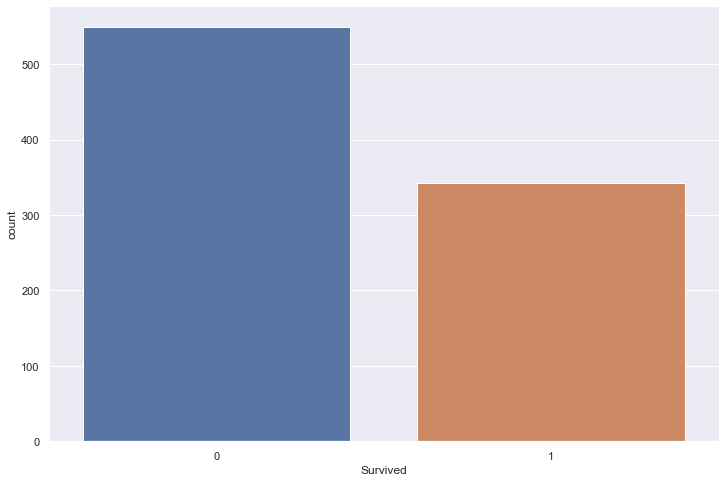

In [51]:
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(12,8)})
sns.countplot(x='Survived',data=train_df)

From the plot, it clearly seems that the larger number of people died as compared to those who survived titanic.

Now, let's visualize survival based on the gender.

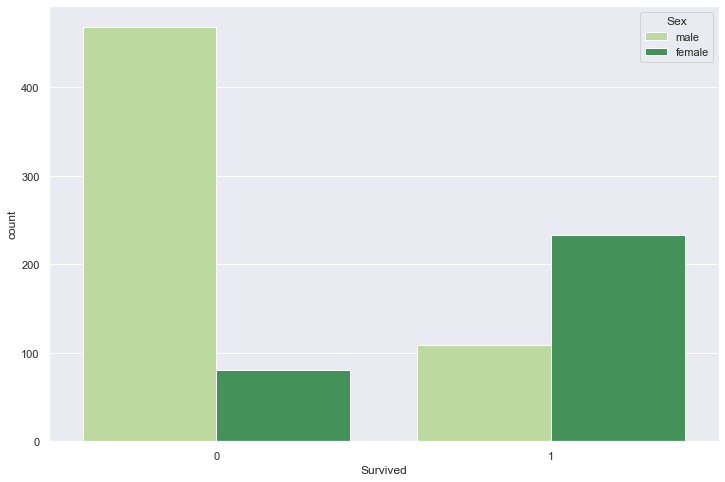

In [52]:
sns.countplot(x='Survived',hue='Sex',data=train_df, palette = 'YlGn')


The Sex variable seems to be a discriminative feature. Women are more likely to survive.

Now, let's check the correlation of the survival with the age variable.

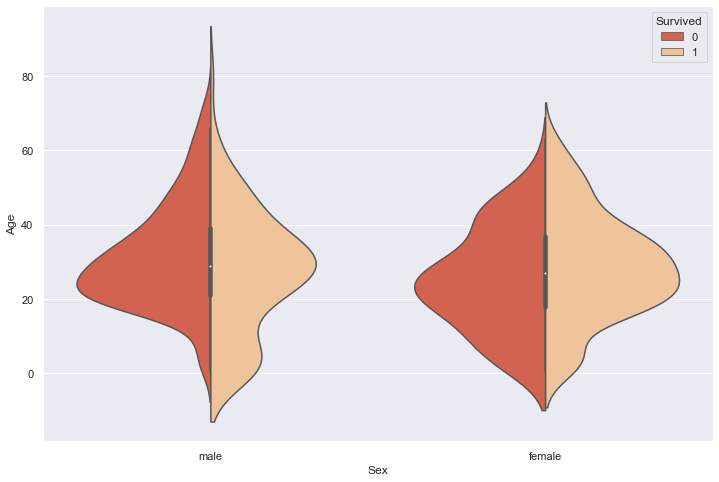

In [53]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_df, split=True, palette='OrRd_r')

As we saw in the chart above:

- Women survive more than men, as depicted by the larger female dark green histogram

Now, we see that:

- The age conditions the survival for male passengers:
    - Younger male tend to survive
    - A large number of passengers between 20 and 40 succumb

- The age doesn't seem to have a direct impact on the female survival

Now, let's check the correlation of the survival with the Pclass variable.

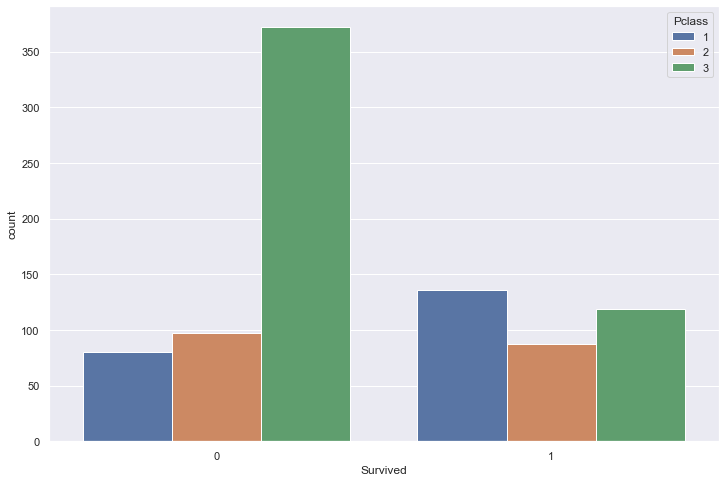

In [54]:
sns.countplot(x='Survived',hue='Pclass',data=train_df)

From above chart, it is clearly indicated that the survival rate of high class(Pclass 1) people survived the most. The higher class is directly associated with the amount paid.

Now, let's check the correlation of the survival with the Embarked variable.

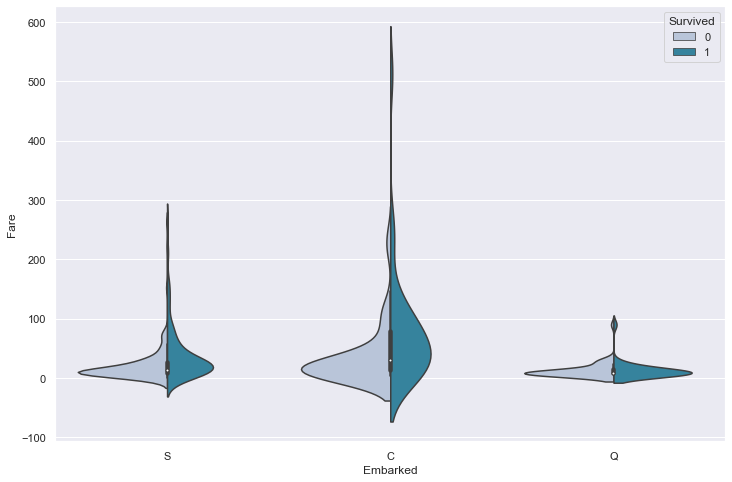

In [55]:
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=train_df, split=True, palette='PuBuGn')

It seems that the embarkation C have a wider range of fare tickets and therefore the passengers who pay the highest prices are those who survive.

We also see this happening in embarkation S and less in embarkation Q.



Now, let's explore more info about the training dataset.

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 130.5+ KB


**Which features contain blank, null or empty values?**

These will require correcting.
- Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
- Cabin > Age are incomplete in case of test dataset.

**What are the data types for various features?**
- Seven features are integer or floats. Six in case of test dataset.
- Five features are strings (object).

Now let's have a descriptive statistic analysis of our set.

In [57]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Garside, Miss. Ethel",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Now, getting rid of the variables which are not relevant for our analysis.

In [58]:
#Deleting columns which are not useful for predictive analysis

#Training set
notuseful_train = ['PassengerId','Name','Ticket','Cabin']
train_df = train_df.drop(notuseful_train,axis=1)

#Test set
notuseful_test = ['PassengerId','Name','Ticket','Cabin']
test_df = test_df.drop(notuseful_test,axis=1)


In [59]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Based on the basic Data Exploration above, we have spotted five categorical predictors in the data.

**Categorical Predictors**: Pclass, Sex, Sibsp, Parch, Embarked

We use bar chart to see how data is distributed for these categorical column

In [60]:
def bar_chart(data,cols):
    #list(enumerate(cols))
    
    fig,subplot=plt.subplots(nrows=1,ncols=len(cols),figsize=(20,5))
    fig.suptitle("Bar Charts of : "+ str(cols), fontsize=18)
    
    for i in enumerate(cols):
        plt.subplot(1,5,i[0]+1)
        res = sns.countplot(i[1],data=train_df)

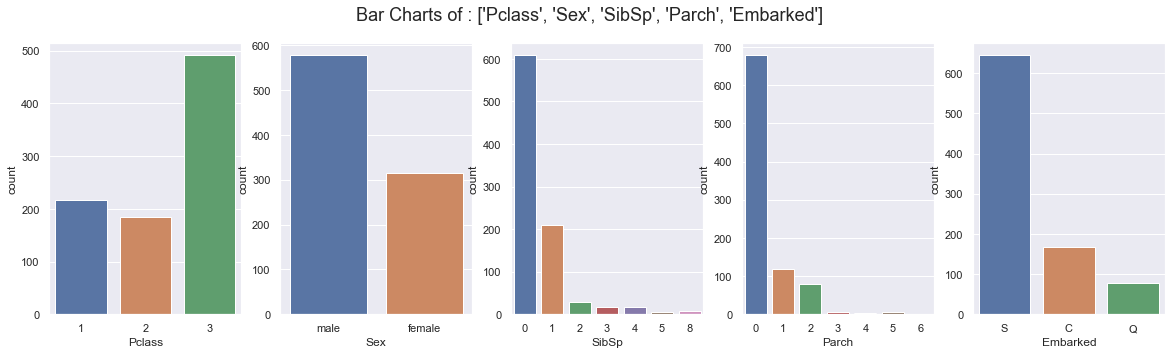

In [61]:
bar_chart(train_df,cols=["Pclass","Sex", "SibSp","Parch","Embarked"])

Visualize distribution of all the continuous Predictor Variables in the Data using Histograms.

Based on the Basic Data Exploration, there are two continuous predictor variables **Age** and **Fare**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C16CD30220>,
      dtype=object)

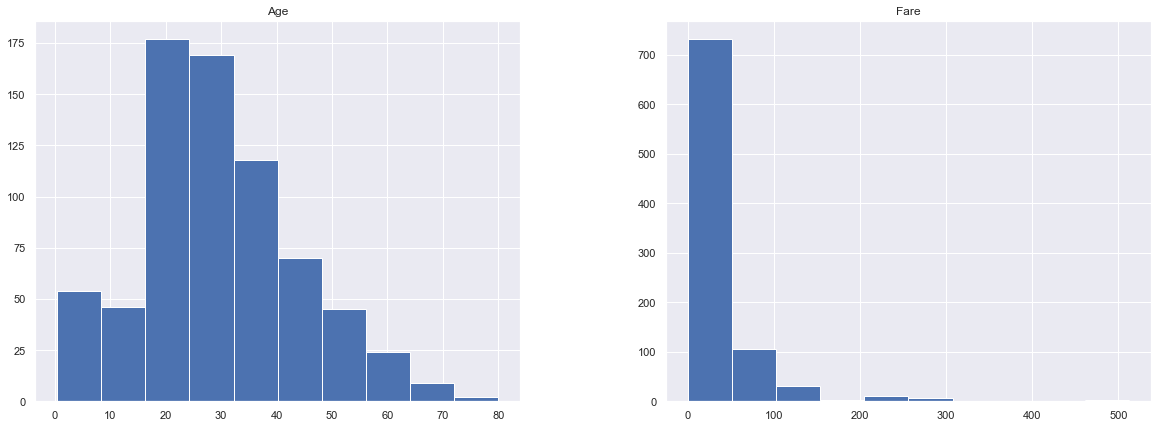

In [62]:
train_df.hist(['Age','Fare'],figsize=(20,7))

Selected Continuous Variables:
- Age: Selected. the Distribution is good
- Fare: Selected. Outliers seen beyond 300, need to treat them.

There are below two options to treat outliers in the data.
- Option-1: Deleting the outlier Records. Only if there are just few rows lost.
- Option-2: impute the outlier values with a logical business values

Below we are finding out the most logical value to be replaced in place of outlier by looking at the histogram.

In [63]:
train_df['Fare'][train_df['Fare']<300].sort_values(ascending=False)

341    263.000
438    263.000
27     263.000
88     263.000
311    262.375
        ...   
277      0.000
633      0.000
302      0.000
597      0.000
271      0.000
Name: Fare, Length: 888, dtype: float64

Above result shows the nearest logical value is 263.0, hence replacing any values above 300 with it.

Replacing outliers for **Fare**

In [64]:
# Replacing outliers with nearest possibe value
train_df.loc[train_df['Fare']>300,'Fare']=263.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C16DBC6460>]],
      dtype=object)

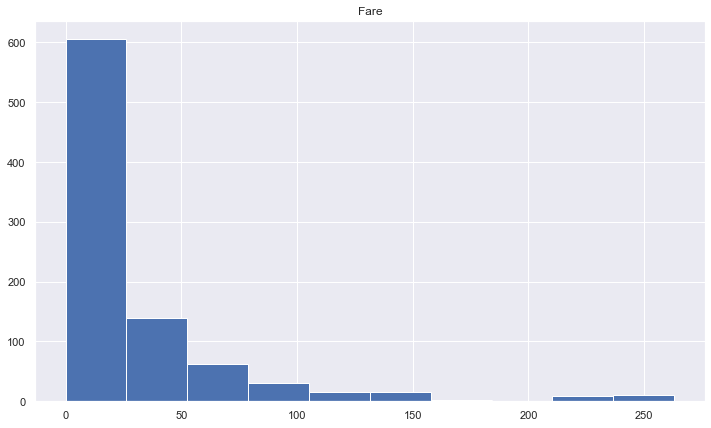

In [65]:
train_df.hist('Fare',figsize=(12,7))

Checking which of the predictor variables are categorical.

In [66]:
# Converting categorical value to numeric

columns = train_df.columns[train_df.dtypes == 'object']
print(columns)

Index(['Sex', 'Embarked'], dtype='object')


**Converting a categorical feature**
<br>Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [67]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

Now converting into numericals for Embarked column.

In [68]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [69]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [70]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


Now, checking number of null values in both training and test set.

In [71]:
# Missing Values treatment
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [72]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

There are below options we can apply here to treat missing values in data

- Delete the missing values rows if there are only few records
- imput the missing values with MEDIAN value for continuous variables
- imput the missing values with MODE value for categorical variables

In [73]:
# Imputing median value for 'Age' column
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)

# Imputing mode value for 'Embarked' column
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace = True)

# Removing other rows with na values
test_df.dropna(inplace=True)

In [74]:
train_df.isnull().sum().sum()

0

In [75]:
test_df.isnull().sum().sum()

0

All the null values have been replaced by appropriate values in both sets successfully.

In [76]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
5,0,3,0,28.0,0,0,8.4583,2.0
6,0,1,0,54.0,0,0,51.8625,0.0
7,0,3,0,2.0,3,1,21.0750,0.0
8,1,3,1,27.0,0,2,11.1333,0.0
9,1,2,1,14.0,1,0,30.0708,1.0


In [77]:
test_df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
5,3,0,14.0,0,0,9.2250,0
6,3,1,30.0,0,0,7.6292,2
7,2,0,26.0,1,1,29.0000,0
8,3,1,18.0,0,0,7.2292,1
9,3,0,21.0,2,0,24.1500,0


# Model, predict and solve

Now we are ready to train a model and predict the required solution. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Sex, Age, Fare...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset.

<br>There are many model algorithms, but we are mainly using the ones given below:
- Logistic Regression
- Random Forest
- Decision Tree
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier



In [78]:
X = train_df.drop('Survived',axis=1)
y = train_df['Survived']

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 7), (268, 7), (623,), (268,))

In [80]:
# Logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Measuring accuracy on Testing Data
accuracy_log = accuracy_score(y_pred, y_test)
accuracy_log

0.8059701492537313

In [81]:
# Random forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Measuring accuracy on Testing Data
accuracy_random_forest = accuracy_score(y_pred, y_test)
accuracy_random_forest

0.7798507462686567

In [82]:
# Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred  = dt.predict(X_test)

# Measuring accuracy on Testing Data
acc_decision_tree = accuracy_score(y_pred, y_test)
acc_decision_tree

0.7350746268656716

In [83]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Measuring accuracy on Testing Data
accuracy_knn = accuracy_score(y_pred, y_test)
accuracy_knn

0.7014925373134329

In [84]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Measuring accuracy on Testing Data
accuracy_svc = accuracy_score(y_pred, y_test)
accuracy_svc

0.6529850746268657

In [85]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

# Measuring accuracy on Testing Data
accuracy_gaussian = accuracy_score(y_pred, y_test)
accuracy_gaussian

0.7947761194029851

In [86]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [accuracy_svc, accuracy_knn, accuracy_log, 
              accuracy_random_forest, accuracy_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.805970
4,Naive Bayes,0.794776
3,Random Forest,0.779851
5,Decision Tree,0.735075
1,KNN,0.701493
0,Support Vector Machines,0.652985
